# Homework 2

## Problem 1

#### 1a


$$
E_{X \sim q(\cdot)}(a(X)) \stackrel{(1)}{=} 
\int a(x) q(x) dx = 
\int \frac{1}{A} \frac{\pi(x)}{q(x)} q(x) dx = 
\frac{1}{A} \int \pi(x) dx \stackrel{(2)}{=} 
\frac{1}{A} \cdot 1 = 
\frac{1}{A}$$

$(1)$ substitute expectation with an integral

$(2)$ Integral $\int \pi(x) dx = 1$, because $\pi(x)$ is a density function.

#### 1b


Term $E(a(X))$ can be seen as a probability of success in a Bernoulli experiment. Geometric distibution models the number of i.i.d. Bernoulli trials needed to get one success.
Therefore the expected number of samples from $q(\cdot)$ until the first appearance can be modelled through a geometric distribution $G_{p}(X=k)$ with success probability
$$p = E(a(X)) = \frac{1}{A}$$

The expect value of a geometrical distribution equals to this:
$$E[G_{p}(X=k)] = \frac{1}{p}$$

Which for $p = \frac{1}{A}$ results in:
$$E[G_{p}(X=k)] = A$$

Answer: $A$


### 1c

Maximizing $E[a(x)]=\frac{1}{A}$ is equivalent to minimizing $A$. As given in 1.7 in script, $A$ has to be chosen in a way so that:
$$ \pi(x) \le Aq(x) \quad \forall x$$

Then our best choice of $A$ given $q(x)$ is:
$$\min A = \max_{x} \frac{\pi(x)}{q(x)}$$

If we now optimize over different variants of $q(\cdot)$, we get that:
$$\min_{q(\cdot)} A =  \min_{q(\cdot)} max_{x} \frac{\pi(x)}{q(x)}$$

Therefore to maximize $E[a(x)]$ we want to chose $q(x)$ so that the maximum ratio between $\pi(x)$ and $q(x)$ (for different values of $x$) is as low as possible:
$$\max_{q(\cdot)} E[a(x)]
\Leftrightarrow
\min_{q(\cdot)} A = \min_{q(\cdot)} max_{x} \frac{\pi(x)}{q(x)}$$

Best $q(x)$:
$$q'(x) = arg \min_{q(\cdot)} max_{x} \frac{\pi(x)}{q(x)}$$

## Problem 2

In [1]:
# get 0 for a1 and 1 for a2
r_alpha <- function(n, a){
    u <- runif(n)
    a1 = u < (exp(1)/(a+exp(1)))
    u[a1] <- 0
    u[!a1] <- 1
    return(u)
}

In [2]:
# get samples from normalized q1(x) distribution
r_q1 <- function(n, a){
    u <- runif(n)
    x <- u^(1/a)
}

# get samples from normalized q2(x) distribution
r_q2 <- function(n){
    u <- runif(n)
    x <- 1-log(u)
    return(x)
}

In [3]:
# get samples from the q(x) distribution using r_alpha, r_q1, r_q2
r_q <- function(n, a){
    q <- r_alpha(n, a)
    a1 <- q==0
    a2 <- q==1
    n_a1 <- sum(a1)  # num of samples to generate from q1
    n_a2 <- sum(a2)  # num of samples to generate from q2
    q[a1] <- r_q1(n_a1, a)
    q[a2] <- r_q2(n_a2)
    return(q)
}

In [4]:
# get samples via rejecting sampling and envelope A*q(x)
r_G <- function(n, a){
    
    G <- numeric(n)
    A <- (1/a + 1/(exp(1))) / gamma(a)

    n_sample = n * A  # Sample more, coz some will be rejected

    n_first <- 1
    while(TRUE){
        x <- r_q(n_sample, a)  # samples from q(x)
        
        left <- A * runif(n_sample) * d_q(x,a)
        right <- d_f(x,a)
        approved <- left <= right  # which samples have passed the test
        n_approved <- sum(approved)

        n_last = n_first + n_approved - 1
        if (n_last > n) {  # if we generated more than needed
            n_last <- n
            G[n_first:n_last] <- x[approved][1:(n_last+1-n_first)]
            break
        }
        
        G[n_first:n_last] <- x[approved]  # save the approved one to G
        n_first = n_last + 1
    }
    return(G)
}

In [5]:
# density function for q(x)
d_q <- function(x, a){
    a1 <- (exp(1)/(a+exp(1)))
    a2 <- 1 - a1
    x_neg <- x<=0
    x_a1  <- x>0 & x<=1
    x_a2  <- x>1
    x[x_neg] <- 0
    x[x_a1]  <- a1 * a      * x[x_a1]^(a-1)
    x[x_a2]  <- a2 * exp(1) * exp(-x[x_a2])
    return(x)
}

# density for pi(x) = G(a,1)(x)
d_f <- function(x, a){
    pos <- x>0
    x[pos]  <- x[pos]^(a-1) * exp(-x[pos]) / gamma(a)
    x[!pos] <- 0
    return(x)
}

In [6]:
set.seed(42)
R = 10^6

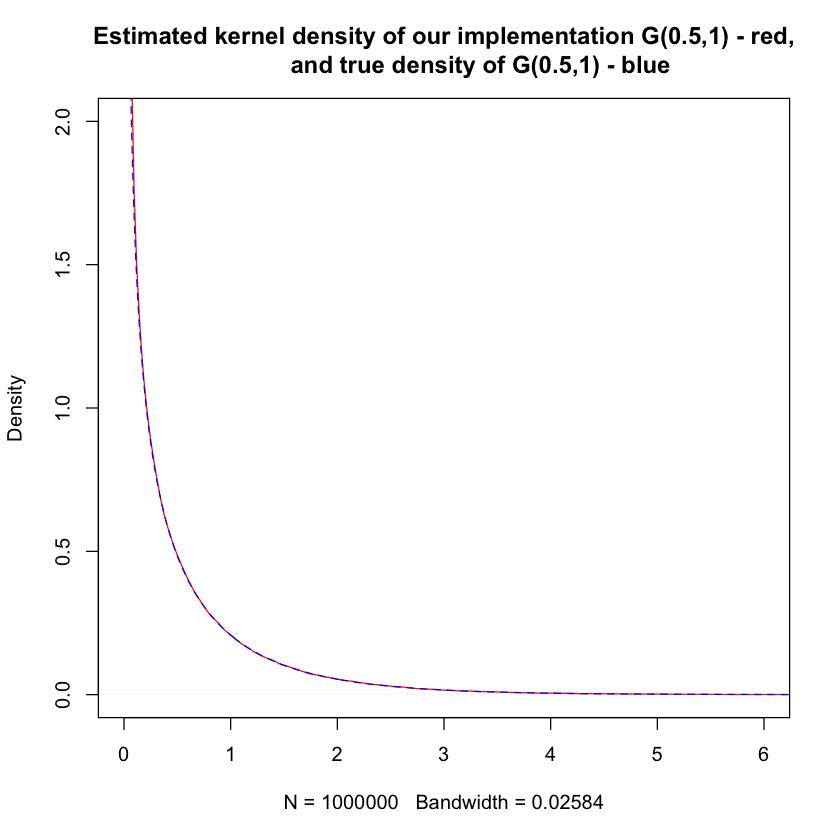

In [7]:
gen_G <- r_G(R, 0.5)  # samples generated from G
x <- seq(0, 10, length=1000)

plot(density(gen_G, from=0), xlim=c(0,6), ylim=c(0,2), col='red',
     main="Estimated kernel density of our implementation G(0.5,1) - red,
           and true density of G(0.5,1) - blue")
lines(x,dgamma(x, 0.5),col='blue', lty=2)

#### Result
We see that the estimated density and the true density are almost identical.

### d_f vs dgamma - same
1) d_f(x) is a proper density
2) density of r_q is slightly bumpy on the 0.5-1 section, otherwise it is very good.

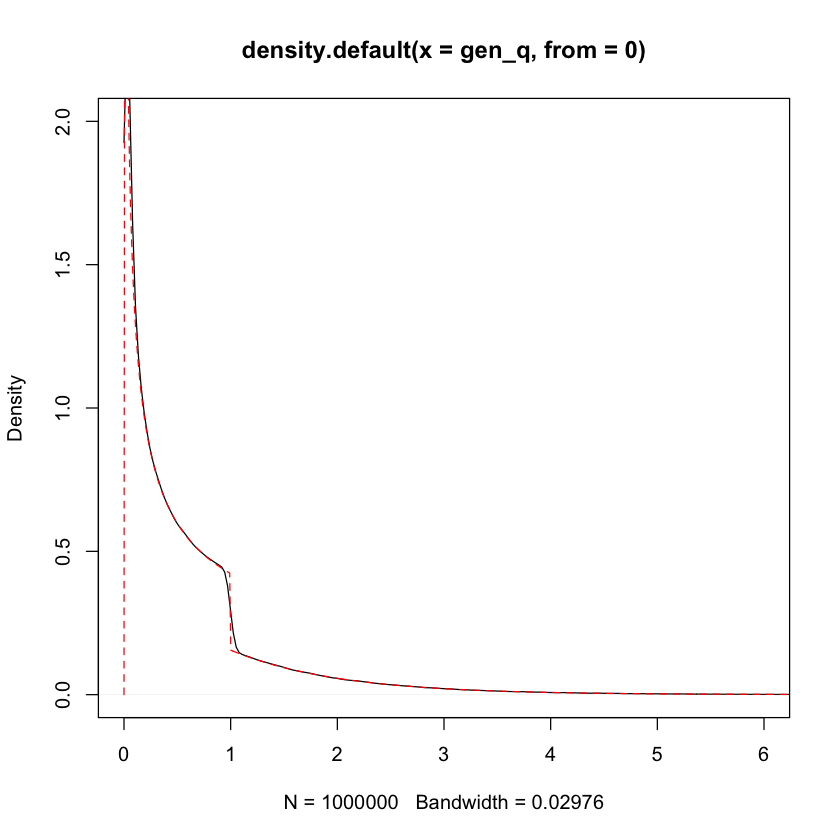

In [8]:
gen_q <- r_q(R, 0.5)  # samples generated from q
x <- seq(0, 10, length=1000)

plot(density(gen_q, from=0), xlim=c(0,6), ylim=c(0,2),)
lines(x,d_q(x, 0.5),col="red", lty=2)
# lines(x,dgamma(x, 0.5),col="blue", lty=2)
# lines(x,d_f(x, 0.5),col="blue", lty=2)

## Problem 3
### 3a
Define functions

In [9]:
r_uv <- function(n){
    n_first <- 1
    n_sample <- n * 4 / pi  # samples more, coz some will be rejected
    u_appr <- numeric(n)
    v_appr <- numeric(n)

    while(TRUE){
        u <- runif(n_sample, -1, 1)
        v <- runif(n_sample, -1, 1)
        
        appr <- (u^2 + v^2) <= 1
        n_appr <- sum(appr)
        # these are the ones that passed the test

        n_last = n_first + n_appr - 1
        if (n_last > n) {
            n_last <- n
            u_appr[n_first:n_last] <- u[appr][1:(n_last+1-n_first)]
            v_appr[n_first:n_last] <- v[appr][1:(n_last+1-n_first)]
            break
        }
        
        u_appr[n_first:n_last] <- u[appr]
        v_appr[n_first:n_last] <- v[appr]
        n_first = n_last + 1
    }
    return(list(u_appr,v_appr))
}

In [10]:
another_method <- function(n){
    l <- r_uv(n)
    u <- l[[1]]
    v <- l[[2]]
    u2_plus_v2 <- u^2 + v^2
    factor <- sqrt(-2*log(u2_plus_v2)) / sqrt(u2_plus_v2)
    x <- u * factor
    y <- v * factor
    return(list(x,y))
}

In [11]:
box_muller <- function(n){
    u <- runif(n)
    v <- runif(n)
    factor <- sqrt(-2*log(u))
    x <- factor * cos(2*pi*v)
    y <- factor * sin(2*pi*v)
    return(list(x,y))
}

In [12]:
set.seed(42)
R=10^6

In [13]:
system.time(box_muller(R))

   user  system elapsed 
  0.104   0.009   0.113 

In [14]:
system.time(another_method(R))

   user  system elapsed 
  0.244   0.024   0.269 

#### Result
We can see that our implementation of Box Müller algorithm is faster than our implementation of "Another method". 
The author sees several possible reasons:
- Implementation of cos and sin functions in R is very efficient.
- `another_method()` uses `sqrt` function which may have complexity similar to `cos` and `sin`, which negates the benefits of ommiting `cos` and `sin` in the first place. At the same time, `another_method()` introduces computational overhead due to using rejection sampling, packing and unpacking of vectors into lists and other additional computations.

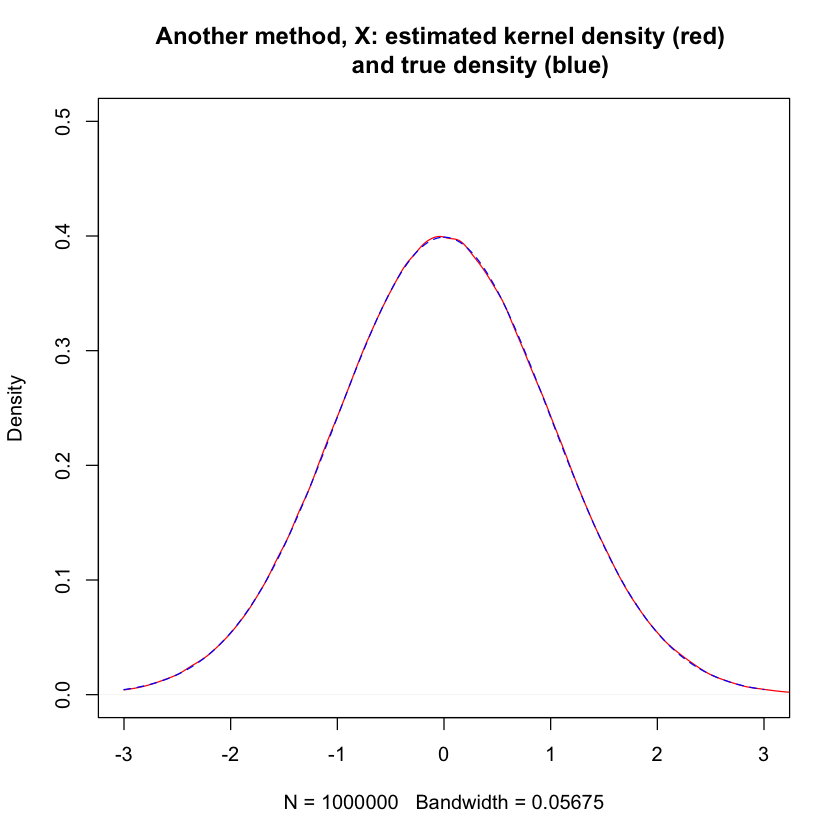

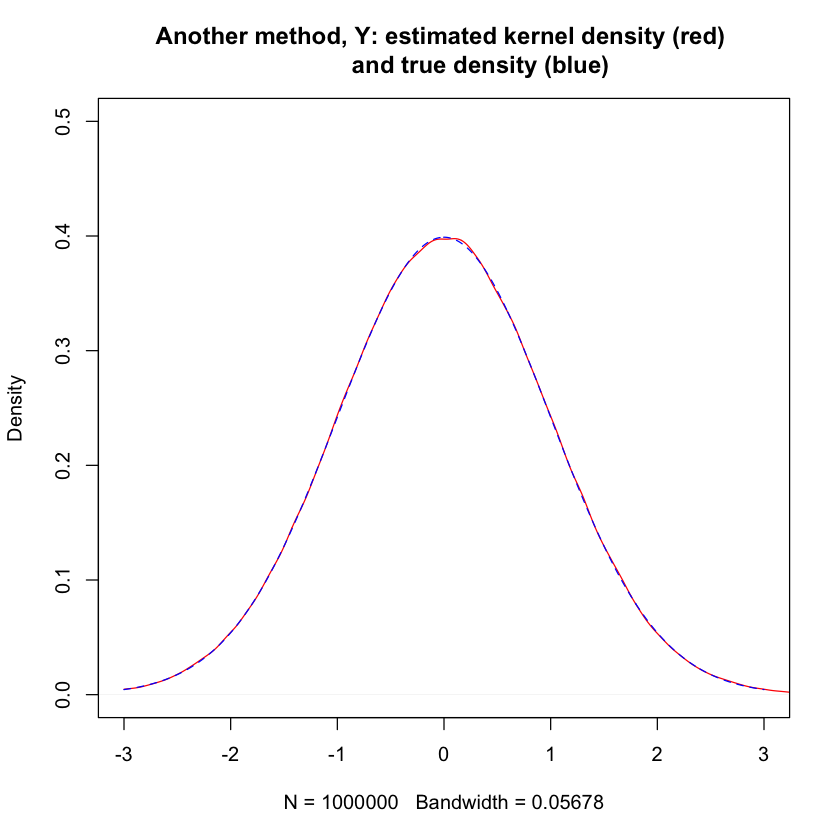

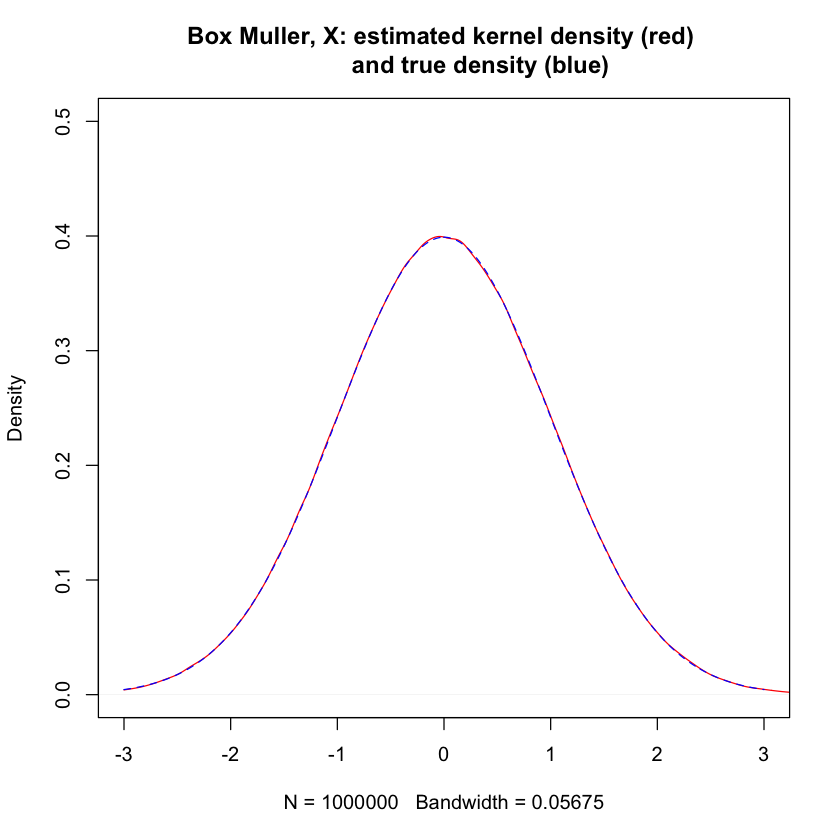

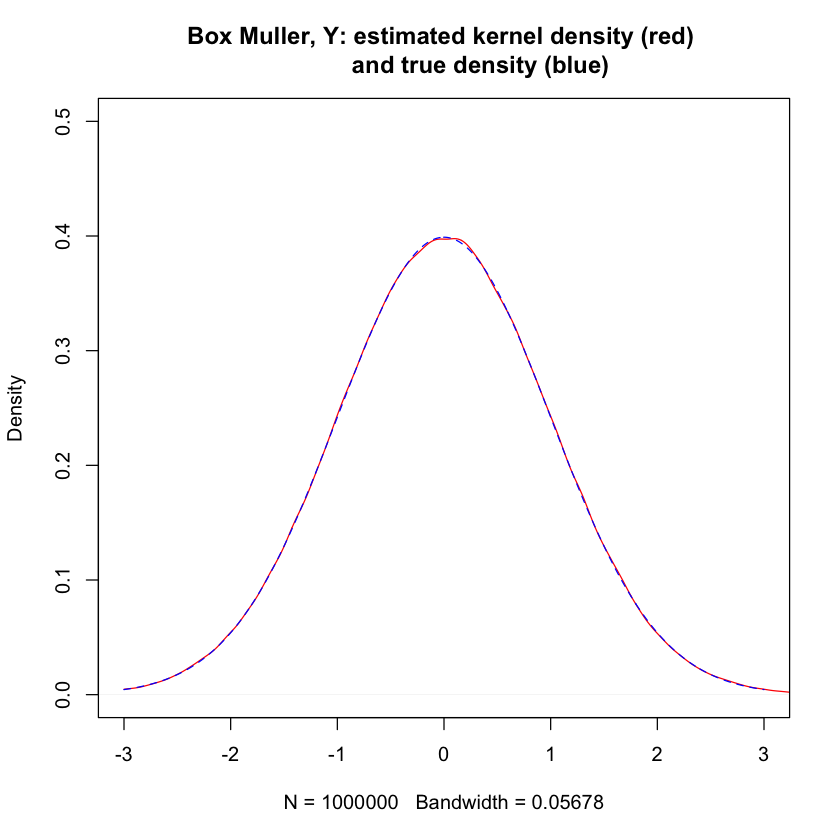

In [15]:
x <- seq(-3, 3, length=1000)
res1 <- another_method(R)
res2 <- box_muller(R)
x_1 <- res1[[1]]
y_1 <- res1[[2]]
x_2 <- res1[[1]]
y_2 <- res1[[2]]

plot(density(x_1, from=-3), xlim=c(-3,3), ylim=c(0,.5), col="red",
     main="Another method, X: estimated kernel density (red) 
           and true density (blue)")
lines(x,dnorm(x),col="blue", lty=2)
plot(density(y_1, from=-3), xlim=c(-3,3), ylim=c(0,.5), col="red",
     main="Another method, Y: estimated kernel density (red) 
           and true density (blue)")
lines(x,dnorm(x),col="blue", lty=2)
plot(density(x_2, from=-3), xlim=c(-3,3), ylim=c(0,.5), col="red",
     main="Box Muller, X: estimated kernel density (red) 
           and true density (blue)")
lines(x,dnorm(x),col="blue", lty=2)
plot(density(y_2, from=-3), xlim=c(-3,3), ylim=c(0,.5), col="red",
     main="Box Muller, Y: estimated kernel density (red) 
           and true density (blue)")
lines(x,dnorm(x),col="blue", lty=2)

#### Result
We see that both implementations, that of Box Müller algorithm and of "Another method" proposed in this problem, produce X and Y which have the same densities as the $N(0,1)$ distribution.

## 3b
### Generalized function

Code explanation:
- Output matrix Y will need n*n_dim entries.
- We first generate n*n_dim samples from N(0,1) by drawing from `another_method()`.
- We draw n_samples pairs of (x,y) which in total results in 2*n_samples i.i.d. samples from N(0,1).
- Stack x and y on top of each other and store as a vector gen_norm.
- If we needed 1 sample less, we drop the last one.
- Bring gen_norm into matrix form and store as X.
- Transform `X` with `chol(sigma)` and add the broadcasted version of `mu`.
- return

Requirements on the input:
- `n` - scalar
- `mu` - matrix of shape (dim, 1)
- `sigma` - matrix of shape (dim, dim)

In [16]:
multivariate <- function(n, mu, sigma){
    n_dim <- length(mu)
    n_samples <- round(n_dim * n / 2) 
    
    l <- another_method(n_samples)  # generate N(0,1) samples
    gen_norm <- c(l[[1]], l[[2]])  # stack x and y on top of each other
    
    if (length(gen_norm) > n_dim * n){  # if we generated 1 element more
        gen_norm <- head(gen_norm, -1)
    }
    X <- array(gen_norm, dim=c(n,n_dim))  # matrix form
    mu <- matrix(rep(mu,n), ncol=n_dim, byrow=T)   # from shape (n_dim,1) to (n,n_dim)
    Y <- X %*% chol(sigma) + mu
    return(Y)
}

#### Sampling from a bivariate distribution

In [17]:
set.seed(42)
R=10^6

Specify mu and sigma

In [18]:
mu <- array(c(1,3), dim=c(2,1))
sigma <- array(c(2,1,1,.5), dim=c(2,2))

In [19]:
gen_m <- multivariate(n=R, mu=mu, sigma=sigma)

In [20]:
colMeans(gen_m)

[1] 1.000382 3.000191

In [21]:
cov(gen_m)

2.002368,1.0011842
1.001184,0.5005921


#### Result
As we can see, the generated matrix has the correct mean and covariance.